In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv('Cancer prediction dataset.csv')

# Download latest version
#path = kagglehub.dataset_download("rabieelkharoua/cancer-prediction-dataset")

df

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
0,58,1,16.085313,0,1,8.146251,4.148219,1,1
1,71,0,30.828784,0,1,9.361630,3.519683,0,0
2,48,1,38.785084,0,2,5.135179,4.728368,0,1
3,34,0,30.040296,0,0,9.502792,2.044636,0,0
4,62,1,35.479721,0,0,5.356890,3.309849,0,1
...,...,...,...,...,...,...,...,...,...
1495,62,1,25.090025,0,0,9.892167,1.284158,0,1
1496,31,0,33.447125,0,1,1.668297,2.280636,1,1
1497,63,1,32.613861,1,1,0.466848,0.150101,0,1
1498,55,0,25.568216,0,0,7.795317,1.986138,1,1


In [4]:
# Checking missing data, if any
df.isnull().sum()

Age                 0
Gender              0
BMI                 0
Smoking             0
GeneticRisk         0
PhysicalActivity    0
AlcoholIntake       0
CancerHistory       0
Diagnosis           0
dtype: int64

In [6]:
# We see there are no null values in this dataset. Quite clean. Hmm! Now let's just check the dataset
df.describe()

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,50.320000,0.490667,27.513321,0.269333,0.508667,4.897929,2.417987,0.144000,0.371333
std,17.640968,0.500080,7.230012,0.443761,0.678895,2.866162,1.419318,0.351207,0.483322
min,20.000000,0.000000,15.000291,0.000000,0.000000,0.002410,0.001215,0.000000,0.000000
25%,35.000000,0.000000,21.483134,0.000000,0.000000,2.434609,1.210598,0.000000,0.000000
50%,51.000000,0.000000,27.598494,0.000000,0.000000,4.834316,2.382971,0.000000,0.000000
75%,66.000000,1.000000,33.850837,1.000000,1.000000,7.409896,3.585624,0.000000,1.000000
max,80.000000,1.000000,39.958688,1.000000,2.000000,9.994607,4.987115,1.000000,1.000000


In [11]:
df.dtypes

Age                   int64
Gender                int64
BMI                 float64
Smoking               int64
GeneticRisk           int64
PhysicalActivity    float64
AlcoholIntake       float64
CancerHistory         int64
Diagnosis             int64
dtype: object

In [15]:
# Let's examine the relationship of each variable with the target variable, Diagnosis

correlation_matrix = df.corr().round(2)
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df

,Age,Gender,BMI,Smoking,GeneticRisk,PhysicalActivity,AlcoholIntake,CancerHistory,Diagnosis
Age,1.00,0.01,0.03,-0.01,-0.03,0.02,0.00,-0.01,0.20
Gender,0.01,1.00,-0.01,0.04,-0.00,0.02,0.01,0.01,0.25
BMI,0.03,-0.01,1.00,-0.01,0.01,0.01,0.00,-0.01,0.19
Smoking,-0.01,0.04,-0.01,1.00,-0.02,-0.04,-0.00,0.02,0.23
GeneticRisk,-0.03,-0.00,0.01,-0.02,1.00,-0.04,-0.02,-0.01,0.25
PhysicalActivity,0.02,0.02,0.01,-0.04,-0.04,1.00,0.03,0.02,-0.15
AlcoholIntake,0.00,0.01,0.00,-0.00,-0.02,0.03,1.00,0.06,0.21
CancerHistory,-0.01,0.01,-0.01,0.02,-0.01,0.02,0.06,1.00,0.39
Diagnosis,0.20,0.25,0.19,0.23,0.25,-0.15,0.21,0.39,1.00


In [24]:
# The correlation analysis above suggests that CancerHistory, GeneticRisk, Gender, Smoking are some of the 
# features that could be important predictors in the model and should be included in the model

# Now let's see the distribution for each variable w.r.to the target variable

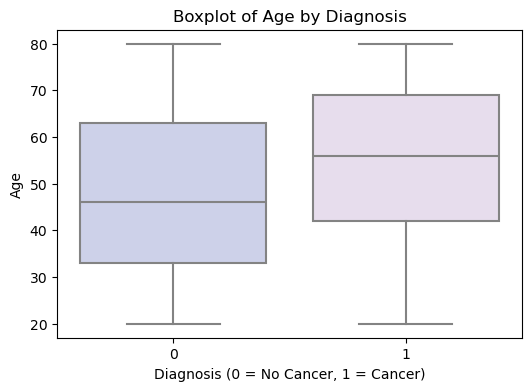

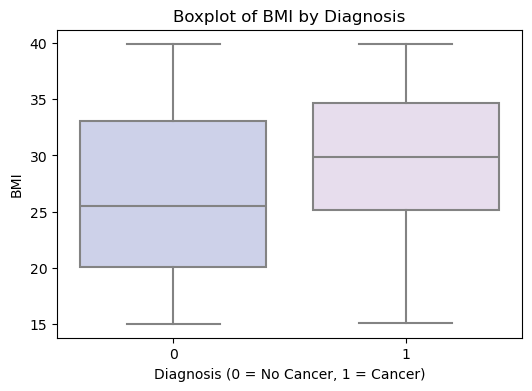

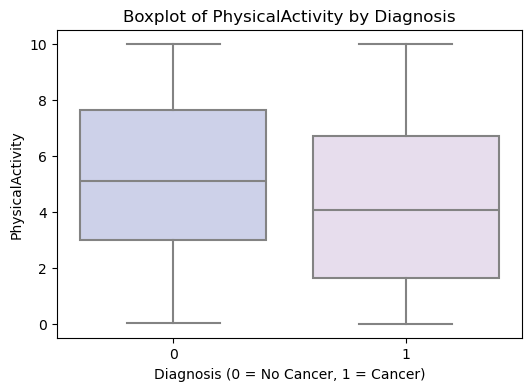

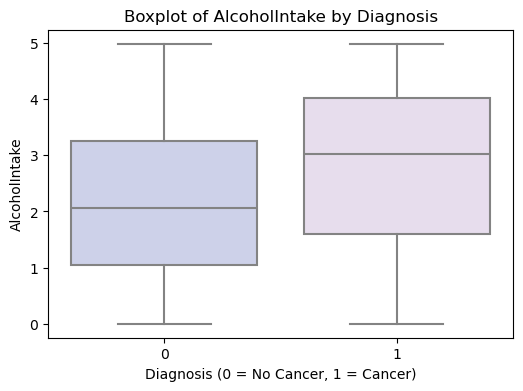

In [54]:
# Numeric variables
num_features = ['Age', 'BMI', 'PhysicalActivity', 'AlcoholIntake']

custom_pastel_colors = ['#C8CEEE', '#E8DAF0']

for feature in num_features:
    plt.figure(figsize=(6, 4))
    
    # Create a custom-colored boxplot
    sns.boxplot(x=df['Diagnosis'], y=df[feature], palette=custom_pastel_colors)
    
    # Add title and labels
    plt.title(f"Boxplot of {feature} by Diagnosis")
    plt.xlabel("Diagnosis (0 = No Cancer, 1 = Cancer)")
    plt.ylabel(feature)
    
    plt.show()

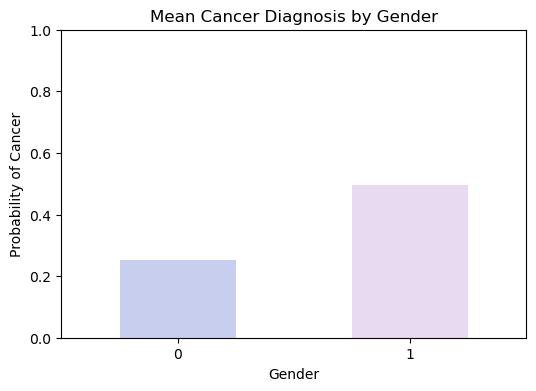

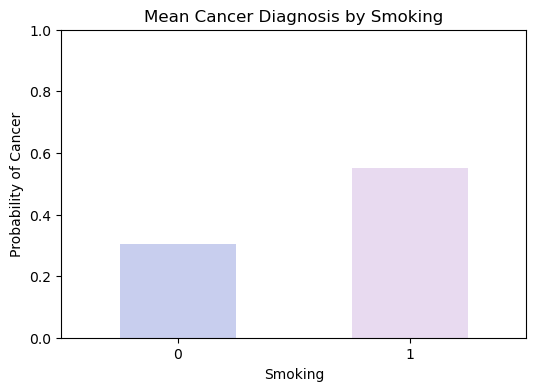

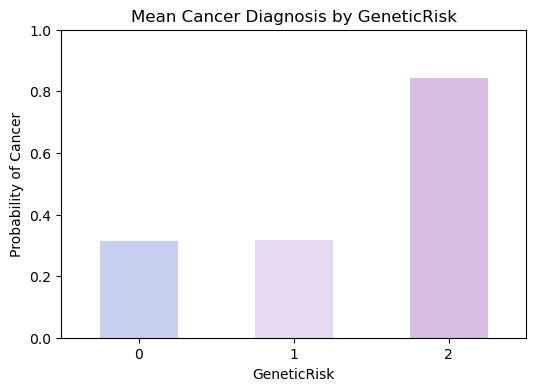

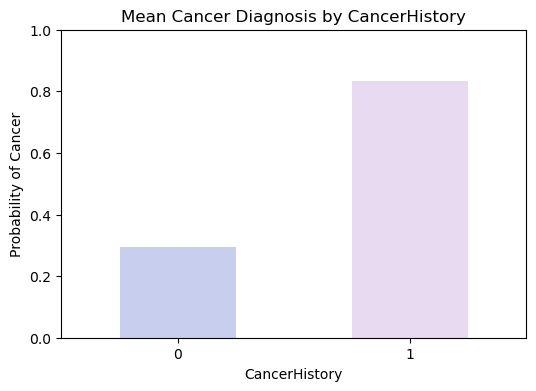

In [53]:
# Categorical variables

cat_features = ['Gender', 'Smoking', 'GeneticRisk', 'CancerHistory']

# Custom pastel color palette
custom_pastel_colors = ['#C8CEEE', '#E8DAF0', '#D8BEE5']

for feature in cat_features:
    plt.figure(figsize=(6, 4))
    
    # Compute mean probability of cancer for each category
    mean_values = df.groupby(feature)['Diagnosis'].mean()
    
    # Plot with custom colors (cycling through if more than 3 categories)
    mean_values.plot(kind="bar", color=[custom_pastel_colors[i % len(custom_pastel_colors)] for i in range(len(mean_values))])
    
    # Add title and labels
    plt.title(f"Mean Cancer Diagnosis by {feature}")
    plt.ylabel("Probability of Cancer")
    plt.ylim(0, 1)  # Keep consistent probability scale
    plt.xticks(rotation=0)  # Keep labels horizontal for readability
    
    plt.show()

In [35]:
# Checking class distribution of the target variable 'Diagnosis'
class_distribution = df['Diagnosis'].value_counts(normalize=True) * 100

class_df = pd.DataFrame({'Diagnosis': class_distribution.index, 'Percentage': class_distribution.values})

class_df

,Diagnosis,Percentage
0,0,62.866667
1,1,37.133333


In [31]:
# The class distribution is more skewed towards 0 but for now let's move to model training

from sklearn.model_selection import train_test_split

X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 42)

In [32]:
# Now, let's initialize a random forest model
from sklearn.ensemble import RandomForestClassifier

# Initializing the model
rf_classifier = RandomForestClassifier(n_estimators = 100,
                                       random_state = 42,
                                       class_weight = "balanced")

# Training the model
rf_classifier.fit(X_train, y_train)

# Making predictions
y_pred = rf_classifier.predict(X_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [33]:
# Now let's evaluate the model peformance

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Recall, Precision, and F1 Scores (macro and weighted)
# Macro weights all the classes equally
print("Recall (Macro):", recall_score(y_test, y_pred, average='macro'))
print("Precision (Macro):", precision_score(y_test, y_pred, average='macro'))
print("F1 Score (Macro):", f1_score(y_test, y_pred, average='macro'))

print("Recall (Weighted):", recall_score(y_test, y_pred, average='weighted'))
print("Precision (Weighted):", precision_score(y_test, y_pred, average='weighted'))
print("F1 Score (Weighted):", f1_score(y_test, y_pred, average='weighted'))

# Print Detailed Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9466666666666667
Recall (Macro): 0.9353639353639354
Precision (Macro): 0.9501256714799665
F1 Score (Macro): 0.9418914338288703
Recall (Weighted): 0.9466666666666667
Precision (Weighted): 0.9472554334433987
F1 Score (Weighted): 0.9462224589608251

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       189
           1       0.96      0.89      0.93       111

    accuracy                           0.95       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300



In [36]:
# The accuracy of the model is 94.6% and the overall weighted recall, precision, and f1 scores are good too.
# But the recall score for class '1' is slighly lower
# Using weighted metrics here since the data is slightly imbalanced. Let's see 

In [38]:
# Let's now compute the confursion matrix

from sklearn.metrics import confusion_matrix

# Generate confusion matrix values
cm = confusion_matrix(y_test, y_pred)

# Convert to DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=["Actual No Cancer (0)", "Actual Cancer (1)"], 
                          columns=["Predicted No Cancer (0)", "Predicted Cancer (1)"])

cm_df

,Predicted No Cancer (0),Predicted Cancer (1)
Actual No Cancer (0),185,4
Actual Cancer (1),12,99


In [41]:
# Now, Let's see which features contributed to the prediction

import pandas as pd

# Extract feature importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display feature importance
print("Feature Importance:\n", feature_importances)

Feature Importance:
 BMI                 0.167985
AlcoholIntake       0.162947
Age                 0.149641
PhysicalActivity    0.143283
CancerHistory       0.136025
GeneticRisk         0.114495
Gender              0.073991
Smoking             0.051634
dtype: float64


In [43]:
# Key takeaways from the predictions
# 1. BMI and Alcohol intake are the top risk factors
# 2. Smoking had the least impact and might have different reasons for that
# 3. Age, Physical Activity, Cancer History and Genetic risk are other strong contributors

In [44]:
# Dumping the RF model into disk

import joblib

joblib.dump(rf_model, "cancer_prediction_model.pkl")

['cancer_prediction_model.pkl']